# Turnover Prediction

The purpose of this project is to predict if an employe will quit their positions 

Import Libraries
---

In [22]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [23]:
plt.rcParams['figure.figsize'] = (12,8)

### Exploratory Data Analysis
---

In [24]:
hr=pd.read_csv('/Users/robin/Desktop/turnover_project/employee_data.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [25]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [26]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


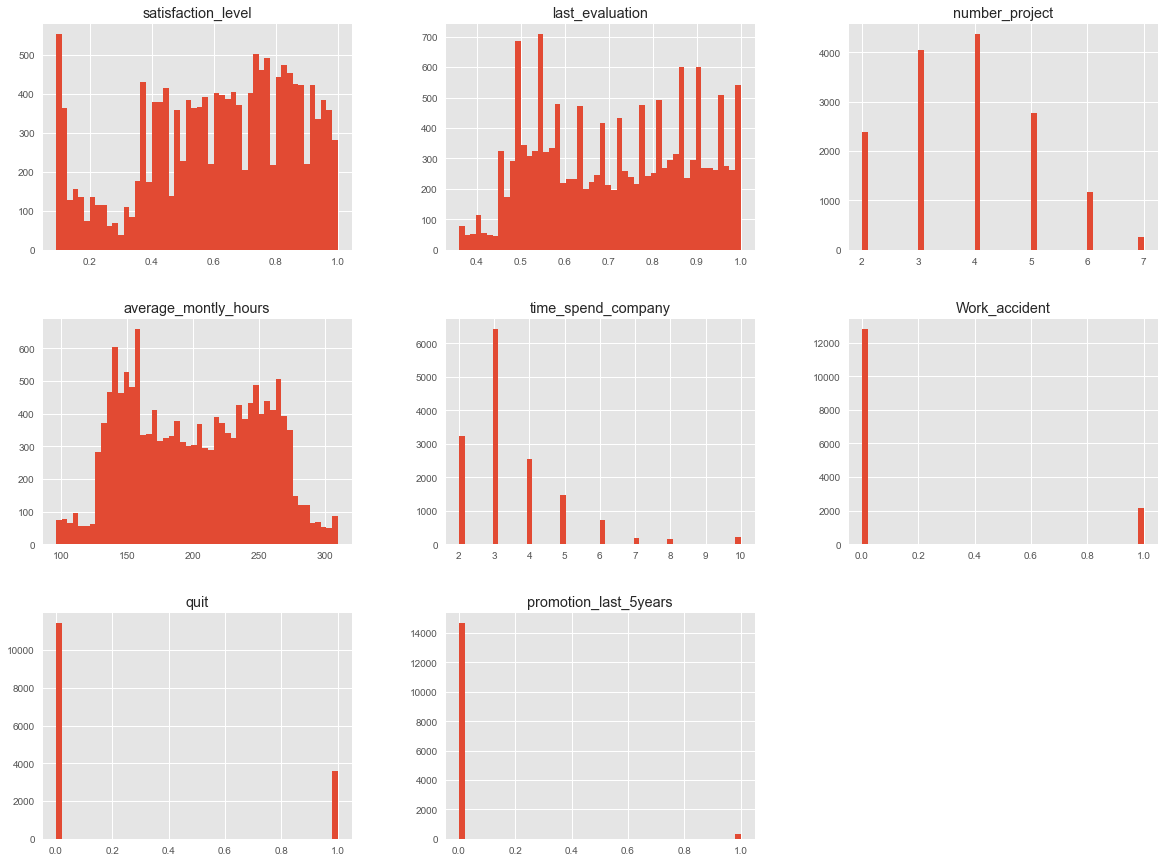

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
hr.hist(bins=50, figsize=(20,15))
plt.show()

In [28]:
list_forbox=['satisfaction_level','last_evaluation', 'number_project','average_montly_hours']

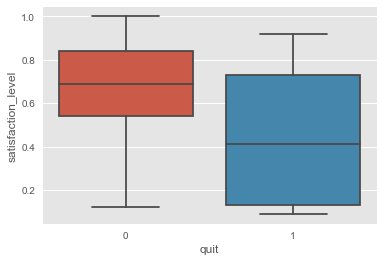

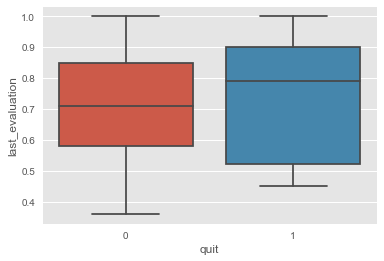

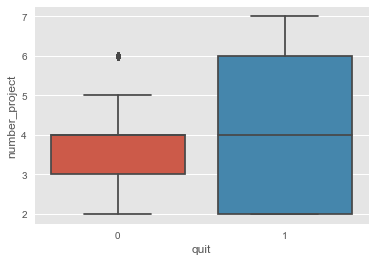

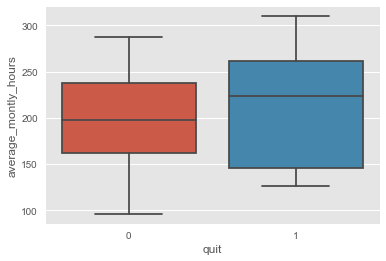

In [29]:
for col in list_forbox:
    plt.figure()
    ax = sns.boxplot(x="quit", y=col, data=hr)

As we can expect people with a low-lewel of satisfaction seem to quit more

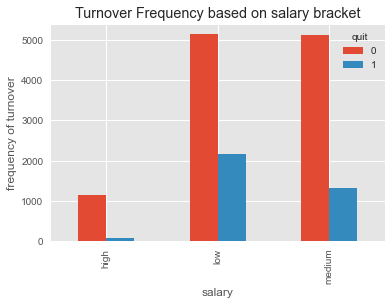

In [30]:
pd.crosstab(hr.salary, hr.quit).plot(kind='bar')
plt.title('Turnover Frequency based on salary bracket')
plt.xlabel('salary')
plt.ylabel('frequency of turnover')
plt.show()

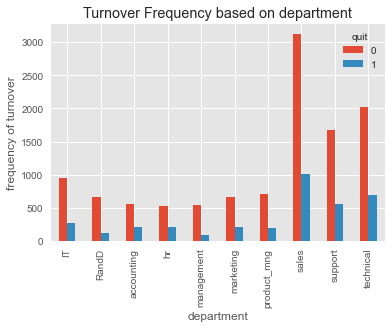

In [31]:
pd.crosstab(hr.department, hr.quit).plot(kind='bar')
plt.title('Turnover Frequency based on department')
plt.xlabel('department')
plt.ylabel('frequency of turnover')
plt.show()

### Encode Categorical Features
---

In [32]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list=pd.get_dummies(hr[var], prefix=var)
    hr=hr.join(cat_list)

In [33]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [34]:
hr.drop(columns=['department','salary'], axis=1, inplace=True)

### Visualize Class Imbalance
---

In [35]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

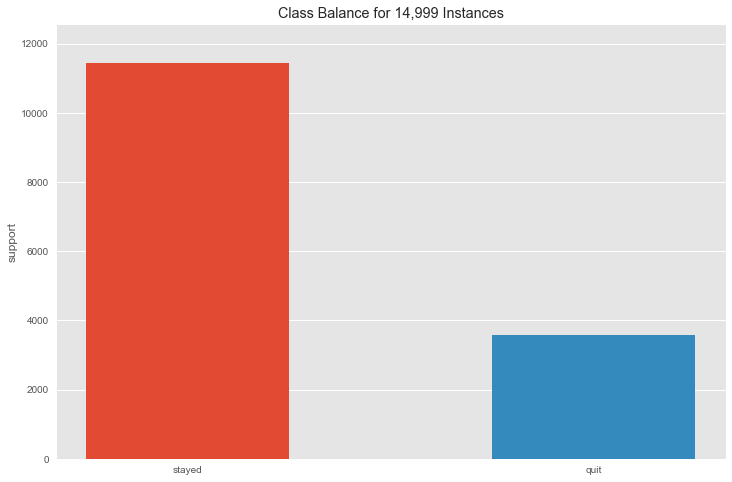

<AxesSubplot:title={'center':'Class Balance for 14,999 Instances'}, ylabel='support'>

In [36]:
visualizer=ClassBalance(labels=['stayed','quit']).fit(hr.quit)
visualizer.show()

### Create Training and Test Sets
---

In [37]:
X=hr.loc[:,hr.columns!='quit']
y=hr.quit

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=0,test_size=0.2, stratify=y)

### Build an Interactive Decision Tree Classifier
---

About:
 
 - Decision trees are non-parametric models which can model arbitrarily complex relations between inputs and outputs, without any a priori assumption
 
- Decision trees handle numeric and categorical variables

- They implement feature selection, making them robust to noisy features (to an extent)

- Robust to outliers or errors in labels

- Easily interpretable by even non-ML practioners.

#### Decision trees: partitioning the feature space:



- Decision trees generally have low bias but have high variance.
- We will solve the high variance problem in Task 8.

In [39]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [40]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator=DecisionTreeClassifier(random_state=0, 
                                     criterion=crit, 
                                     splitter=split,
                                     max_depth=depth,
                                     min_samples_split=min_split,
                                     min_samples_leaf=min_leaf
                                    )
    estimator.fit(X_train, y_train)
    print('Decision Tree Training Accuracy', 
          accuracy_score(y_train, estimator.predict(X_train)))
    print('decision tree test accuracy',
         accuracy_score(y_test, estimator.predict(X_test)))
    graph =  Source(tree.export_graphviz(estimator, out_file=None,
                                        feature_names=X_train.columns,
                                        class_names=['stayed', 'quit'],
                                        filled=True))
    display(Image(data=graph.pipe(format='png')))
    return estimator
    
    

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Build an Interactive Random Forest Classifier
---

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [41]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=['True','False'],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator=RandomForestClassifier(random_state=1,
                                    criterion=crit,
                                    bootstrap=bootstrap,
                                    n_estimators=forests,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf,
                                    n_jobs=-1,
                                    verbose=False)
    estimator.fit(X_train, y_train)
    
    print('Random Forest Training Accuracy', 
          accuracy_score(y_train, estimator.predict(X_train)))
    print('Random Forest test accuracy',
         accuracy_score(y_test, estimator.predict(X_test)))
    num_tree=estimator.estimators_[0]
    print('Visualizing Tree number', 0)
    graph =  Source(tree.export_graphviz(num_tree,
                                         out_file=None,
                                        feature_names=X_train.columns,
                                        class_names=['stayed', 'quit'],
                                        filled=True))
    display(Image(data=graph.pipe(format='png')))
    return estimator
    
    
    

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [42]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

### Feature Importance and Evaluation Metrics
---

In [43]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

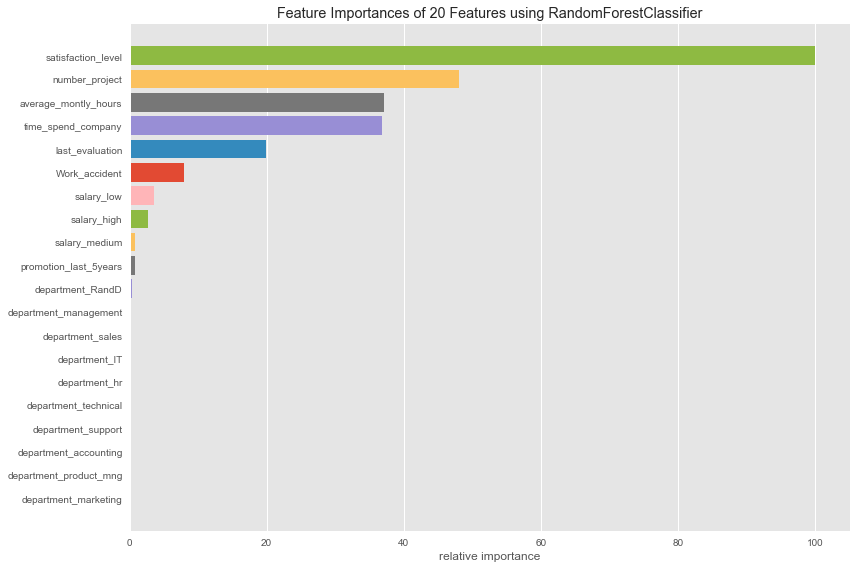

In [44]:
rf= RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=False,
            warm_start=False)
viz= FeatureImportances(rf)
viz.fit(X_train, y_train)
viz.show();

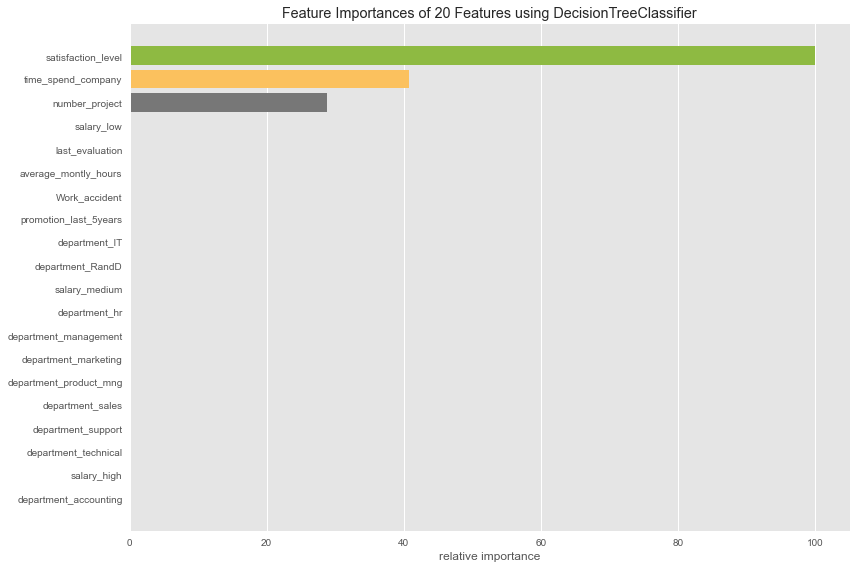

In [45]:
dt=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
viz= FeatureImportances(dt)
viz.fit(X_train, y_train)
viz.show();

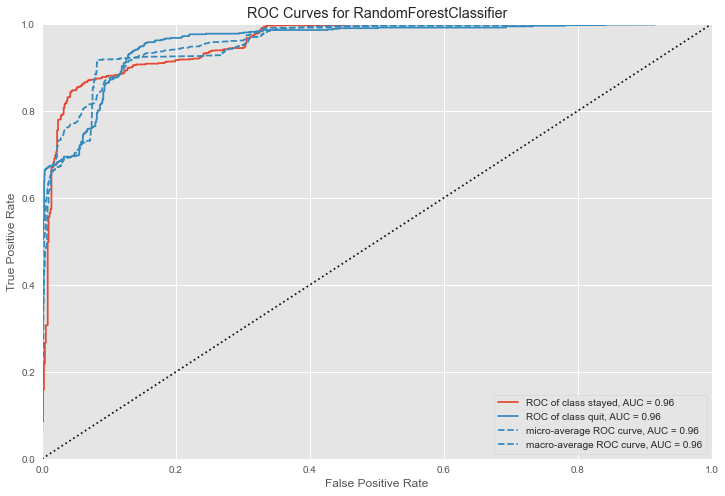

In [46]:
from yellowbrick.classifier import ROCAUC
visualizer=ROCAUC(rf, classes=['stayed', 'quit'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

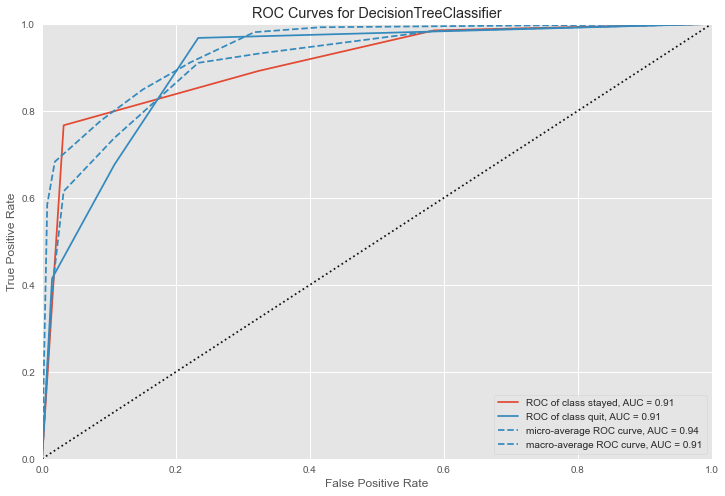

In [47]:
from yellowbrick.classifier import ROCAUC
visualizer=ROCAUC(dt, classes=['stayed', 'quit'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();